"The Goal is to predict whether a person has an income of more than 50K a year or not.
This is basically a binary classification problem where a person is classified into the
>50K group or <=50K group."

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress Matplotlib warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("dataset/cleaned_adult.csv")

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  country         32537 non-null  object
 14  salary          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
numerical_col=[feature for feature in df.columns if df[feature].dtype !="O"]
numerical_col

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [8]:
categorical_col=[feature for feature in df.columns if df[feature].dtype =="O"]
categorical_col

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'country',
 'salary']

## Univariate analysis

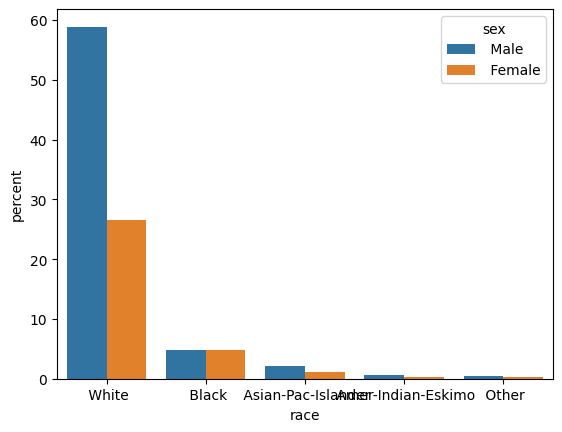

<Figure size 500x2000 with 0 Axes>

In [17]:
sns.countplot(df, x="race", hue="sex", stat='percent')
plt.figure(figsize=(5, 20))
plt.show()


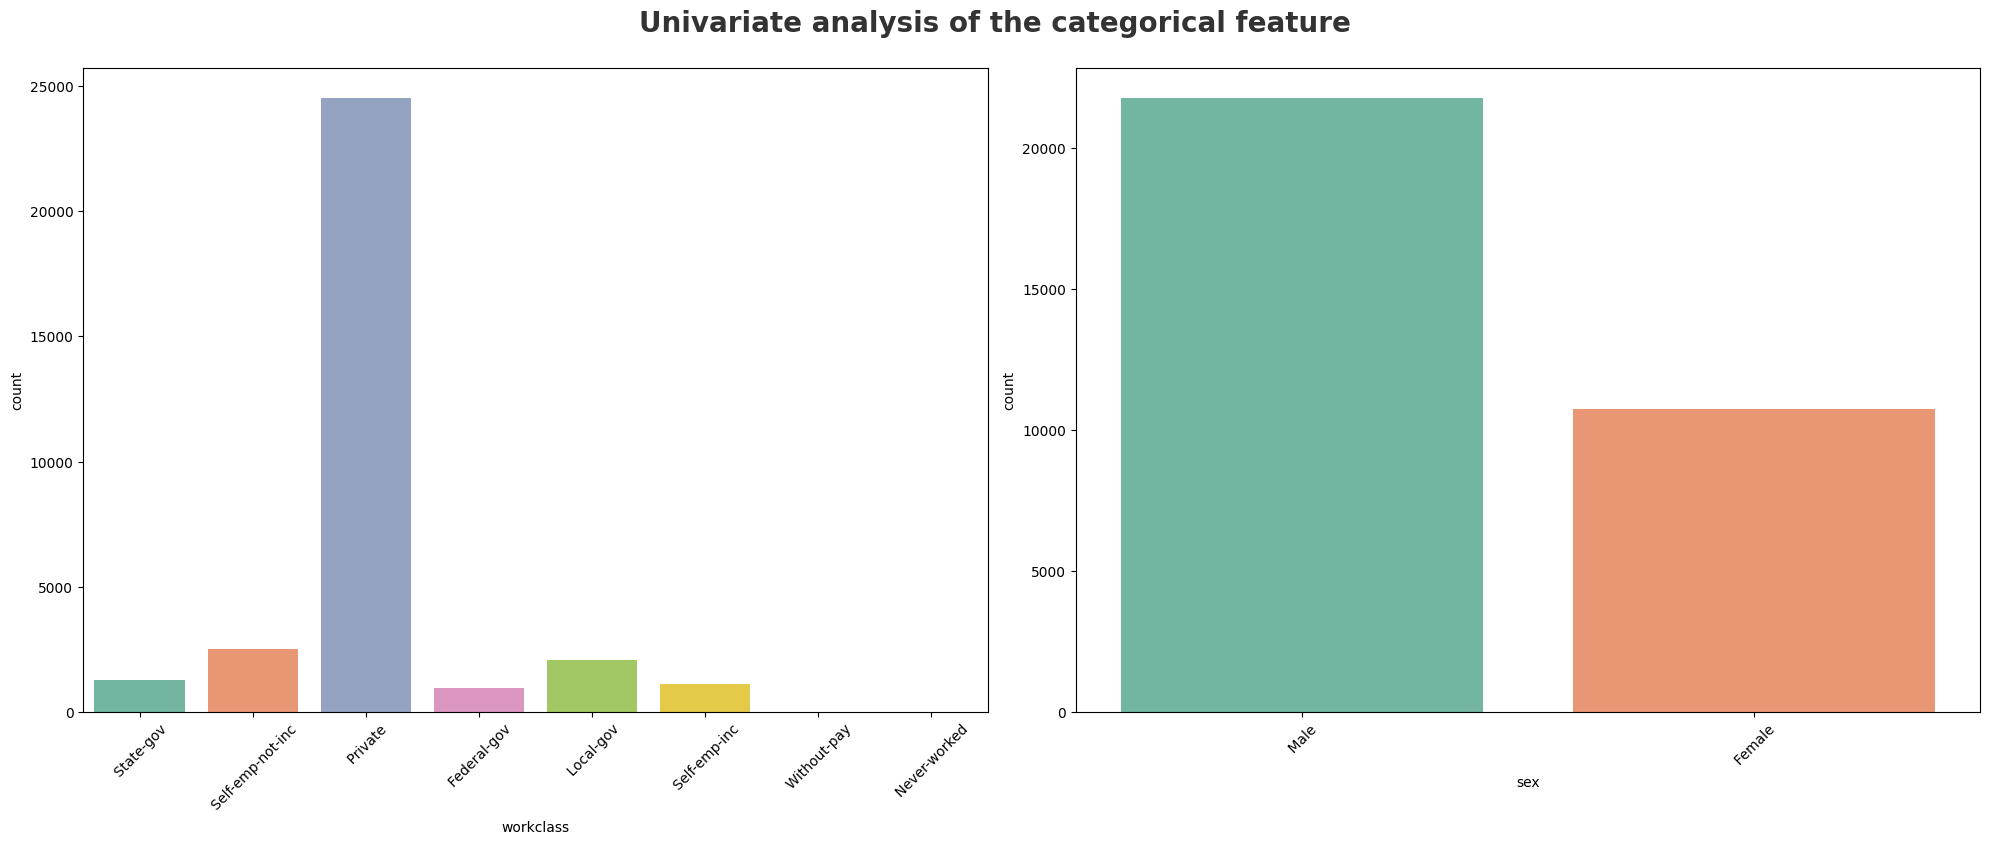

In [25]:
## for categoricat data

plt.figure(figsize=(20,15))
plt.suptitle("Univariate analysis of the categorical feature",fontsize=20,fontweight="bold",alpha=0.8,y=1.)
category=['workclass','sex']
for i in range(0,len(category)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

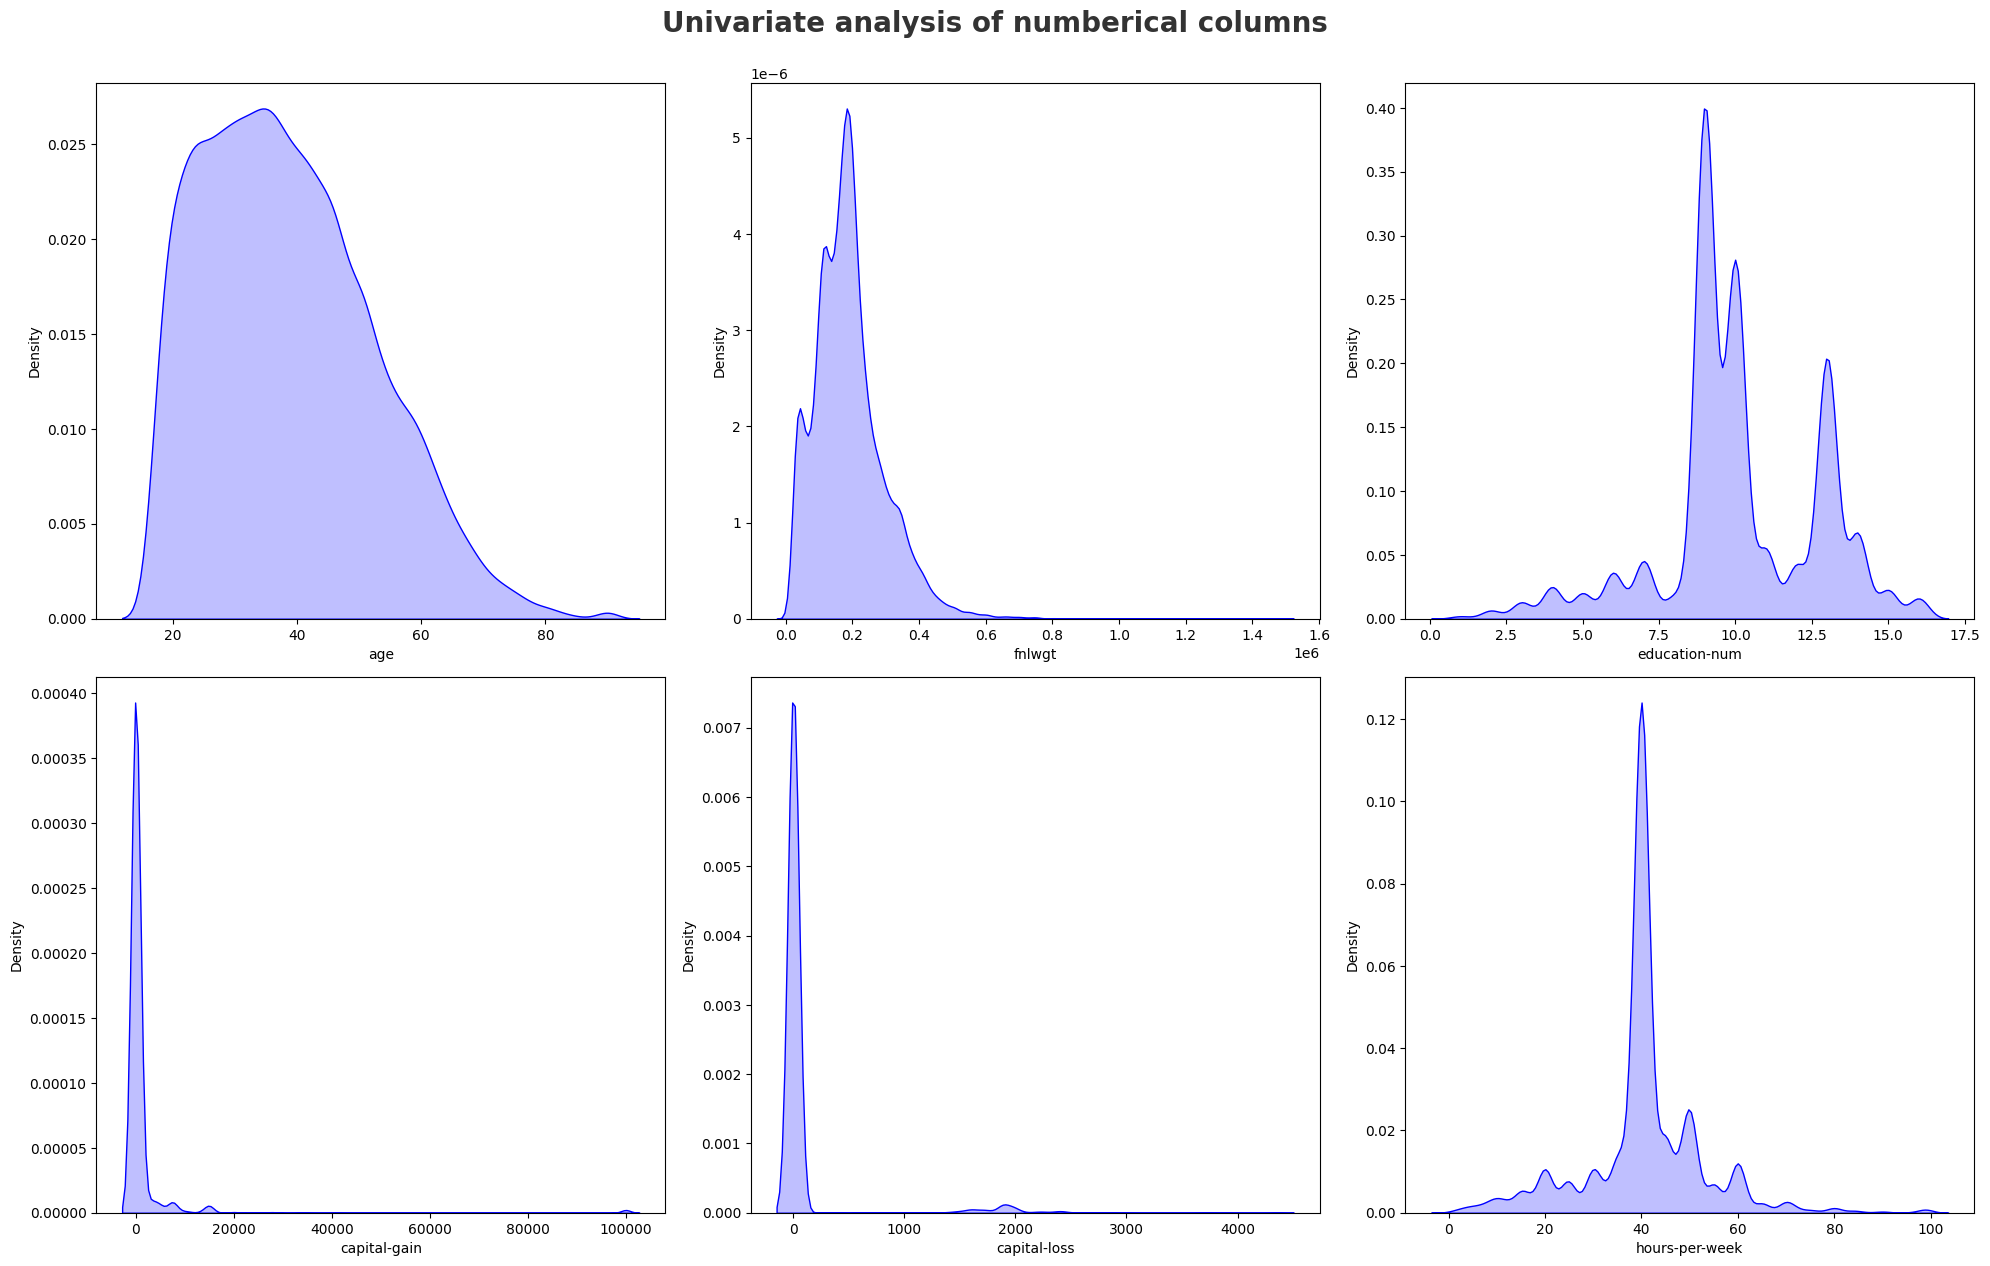

In [26]:
## univariate analysis for the numerical columns


plt.figure(figsize=(20,30))
plt.suptitle("Univariate analysis of numberical columns",fontsize=20,fontweight="bold",alpha=0.8,y=1.)

for i in range(0,len(numerical_col)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[numerical_col[i]],shade=True,color="b")
    plt.xlabel(numerical_col[i])
    plt.tight_layout()

#  Bi-variate analysis"

In [31]:
df.sample(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
21647,39,Private,186183,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
28146,24,Private,417668,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,30,United-States,<=50K


In [29]:
df.groupby(['education'])['education-num'].sum().sort_values(ascending=False)

education
 HS-grad         94446
 Some-college    72820
 Bachelors       69589
 Masters         24108
 Assoc-voc       15202
 Assoc-acdm      12804
 Prof-school      8640
 11th             8225
 Doctorate        6608
 10th             5598
 12th             3464
 7th-8th          2580
 9th              2570
 5th-6th           996
 1st-4th           332
 Preschool          50
Name: education-num, dtype: int64

In [30]:
# we also make other dataframe from data

In [34]:
dataframe1=df.groupby(['education'])["hours-per-week"].sum().sort_values(ascending=False).reset_index()

In [35]:
dataframe1

,education,hours-per-week
0,HS-grad,425794
1,Some-college,283043
2,Bachelors,228113
3,Masters,75480
4,Assoc-voc,57506
5,Assoc-acdm,43218
6,11th,39863
7,10th,34570
8,Prof-school,27317
9,7th-8th,25391


<Axes: xlabel='hours-per-week', ylabel='education'>

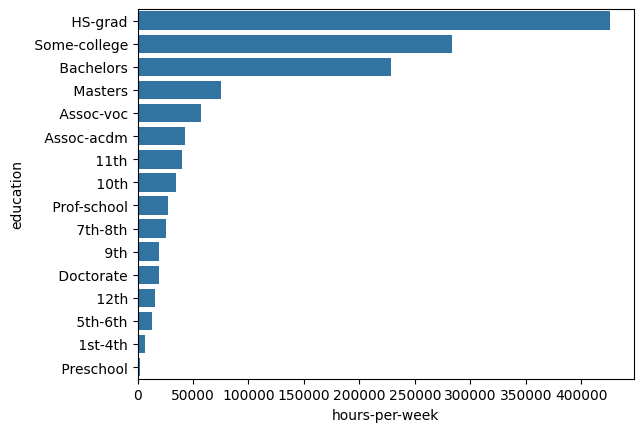

In [37]:
sns.barplot(y="education",x="hours-per-week",data=dataframe1)

# Multi-variate
#### here we take more tha two categories

In [39]:
df.sample()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
12547,26,Private,166051,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,<=50K


In [44]:
dataframe2=df.groupby(["workclass","education"])["hours-per-week"].sum().reset_index()

In [46]:
dataframe2.sort_values("hours-per-week",ascending=False)

,workclass,education,hours-per-week
46,Private,HS-grad,331827
50,Private,Some-college,213231
44,Private,Bachelors,157146
43,Private,Assoc-voc,43499
47,Private,Masters,41210
...,...,...,...
33,Never-worked,HS-grad,40
32,Never-worked,7th-8th,35
94,State-gov,Preschool,24
84,State-gov,1st-4th,20


In [50]:
dataframe2[dataframe2["workclass"]==" Private"]

#here we can only looking for private job's people and his education and woriking time in week

,workclass,education,hours-per-week
35,Private,10th,28910
36,Private,11th,35060
37,Private,12th,13083
38,Private,1st-4th,5637
39,Private,5th-6th,11566
40,Private,7th-8th,19224
41,Private,9th,16458
42,Private,Assoc-acdm,31028
43,Private,Assoc-voc,43499
44,Private,Bachelors,157146


In [51]:
dataframe3=df.groupby(["marital-status","workclass","education"])["hours-per-week"].sum().sort_values(ascending=False).reset_index()

In [53]:
dataframe3

# we can also merge more than 3 columns in the dataframe

,marital-status,workclass,education,hours-per-week
0,Married-civ-spouse,Private,HS-grad,148229
1,Never-married,Private,HS-grad,104049
2,Never-married,Private,Some-college,84656
3,Married-civ-spouse,Private,Some-college,83476
4,Married-civ-spouse,Private,Bachelors,80777
...,...,...,...,...
443,Never-married,Local-gov,1st-4th,20
444,Never-married,Never-worked,11th,10
445,Divorced,Self-emp-inc,12th,10
446,Separated,Self-emp-not-inc,Doctorate,10
